### Student Information
Name:Victor Lim Kai Xuan 林凱軒

Student ID:613530019

GitHub ID:victorlim98

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

# 1. Data Preprocessing
In this state, we will install all the essential libraries and packages necessary for this lab session. 

In [ ]:
# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import re
from datetime import datetime
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/victorylim98/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1.1 Data Source
We will input a dataset called Reddit-stock-sentiment.csv.
This dataset contains stock sentiment data from Reddit posts related to various stocks.
The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. 

In [ ]:
df = pd.read_csv('/Users/victorylim98/Documents/Docs/Handouts/Data Mining/Lab1/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv')
print(df.head(1)) #check whether the dataset imported successfully.

%load_ext autoreload
%autoreload 2

#Check condition
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0


      type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   

                                             title        author  \
0  Retardation is on the menu boys! WSB is so back  StickyTip420   

                                    url  upvotes  downvotes  upvote_ratio  \
0  https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN           NaN   

               text  subjectivity  polarity  sentiment entities  label  
0  Calls on retards           1.0      -0.9       -1.0       []   -1.0  
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/victorylim98/Documents/Docs/Handouts/Data Mining/Lab1/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (main, Sep 25 2025, 11:29:05) [Clang 17.0.0 (clang-1700.3.19.1)]


# 2. Data Process
In order to make the data ready for analysis, we need to preprocess the data. 
From the dataset, we will keep only a few categories that we need for analysis, such as 'text', 'datetime', 'subreddit', 'title', 'text', 'subjectivity', 'polarity', 'upvotes', 'label'.

In [ ]:
# Keep only useful columns
df = df[['datetime', 'subreddit', 'title', 'text', 'subjectivity', 'polarity', 'upvotes', 'label']]

Noted that we have a column that involve datetime. We need to convert it to proper format.

In [ ]:
# Convert datetime to proper format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

In order to make the data ready for analysis, we need to drop rows with missing text.


In [ ]:
df.dropna(subset=['text'], inplace=True)

# 3. DATA TRANSFORMATION

The data we are using is already a DataFrame. We do not need to perform any transformation on it.But we need to familiarize with the data.


In [ ]:
# 3.1 Familiarize with Data
print("\n📊 Sentiment label counts:")
print(df['label'].value_counts())

print("\n🧾 Summary Statistics:")
print(df.describe())


📊 Sentiment label counts:
label
 0.0    401
-1.0    315
 1.0    108
Name: count, dtype: int64

🧾 Summary Statistics:
                            datetime  subjectivity    polarity      upvotes  \
count                            824    824.000000  824.000000   824.000000   
mean   2024-09-05 10:27:39.720873728      0.353902    0.037746     7.791262   
min              2021-01-28 17:58:52      0.000000   -1.000000   -74.000000   
25%    2025-04-08 02:05:21.249999872      0.000000    0.000000     1.000000   
50%       2025-04-11 10:55:40.500000      0.374802    0.000000     1.000000   
75%              2025-04-11 15:32:52      0.590833    0.160000     4.000000   
max              2025-04-12 03:23:21      1.000000    1.000000  1105.000000   
std                              NaN      0.317379    0.300796    44.355409   

            label  
count  824.000000  
mean    -0.251214  
min     -1.000000  
25%     -1.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  
std      0

# 4. DATA MINING USING PANDAS
The text introduces missing values into a dataset for practice, showing how Pandas simplifies handling them. It reviews Data Mining methods for missing values, often from incomplete collection, which affect analysis.

In [ ]:
# 4.1 Missing Values
print("\n🔍 Missing Values per Column:")
print(df.isnull().sum())



🔍 Missing Values per Column:
datetime        0
subreddit       0
title           0
text            0
subjectivity    0
polarity        0
upvotes         0
label           0
dtype: int64


Good, now we knew there are no missing values found. But we still need to make it clean by fill in missing value and dealing with duplicates.

In [ ]:
# Fill missing numeric values with 0
df['upvotes'].fillna(0, inplace=True)

# Dealing with Duplicates
df.drop_duplicates(subset=['text'], inplace=True)
print("\n✅ After Removing Duplicates:", df.shape)


✅ After Removing Duplicates: (824, 8)


/var/folders/59/dj_x36mj0831h5fs1t3mlp7h0000gn/T/ipykernel_9724/874865259.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['upvotes'].fillna(0, inplace=True)


# 5. DATA PREPROCESSING

In this phase, we need to make sure that the dataset is ready for analysis and modeling.
The goal is to clean, enhance, and structure the data so it becomes more meaningful and ready for machine learning or sentiment analysis.

### 5.1 Sampling – balancing the dataset across sentiment categories to avoid bias.

In [ ]:
min_count = df['label'].value_counts().min()
balanced_df = df.groupby('label').sample(min_count, random_state=42)

### 5.2 Feature Creation – generating new variables like text length or posting hour to find out more insight.


In [ ]:
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
df['hour'] = df['datetime'].dt.hour

### 5.3 Feature Subset Selection – keeping only relevant attributes that contribute to understanding sentiment.


In [ ]:
features = ['subreddit', 'subjectivity', 'polarity', 'upvotes', 'text_length', 'label']

### 5.4 Attribute Transformation – cleaning and standardizing text data such as removing punctuation or converting to lowercase for more consistent analysis. It will make the analysis more reliable.


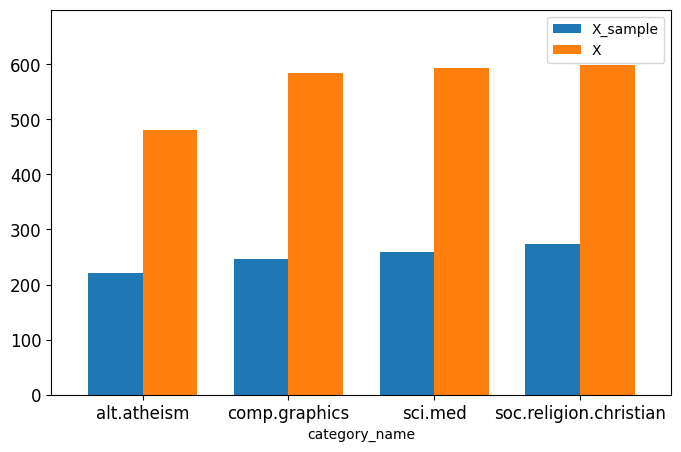

In [ ]:
counts_sample = X_sample['category_name'].value_counts().sort_index()
counts_full = X['category_name'].value_counts().sort_index()

# Combine into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'X_sample': counts_sample,
    'X': counts_full
}).fillna(0)

ax = comparison_df.plot(
    kind='bar',
    width=0.75,
    ylim = [0, X.category_name.value_counts().max()+100],
    rot = 0, fontsize = 12, figsize = (8, 5))


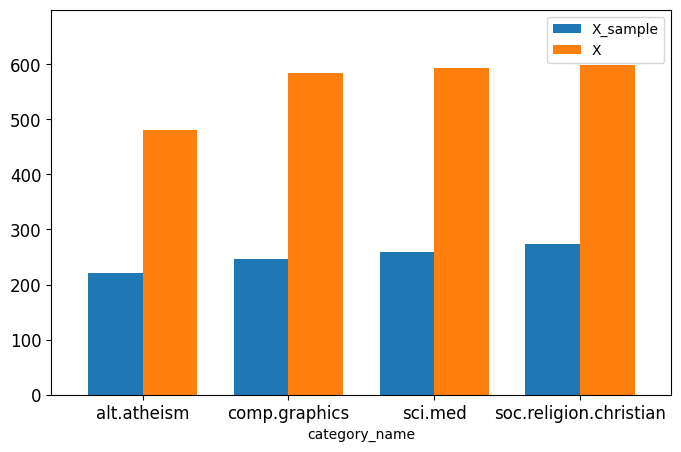

In [ ]:
counts_sample = X_sample['category_name'].value_counts().sort_index()
counts_full = X['category_name'].value_counts().sort_index()

# Combine into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'X_sample': counts_sample,
    'X': counts_full
}).fillna(0)

ax = comparison_df.plot(
    kind='bar',
    width=0.75,
    ylim = [0, X.category_name.value_counts().max()+100],
    rot = 0, fontsize = 12, figsize = (8, 5))


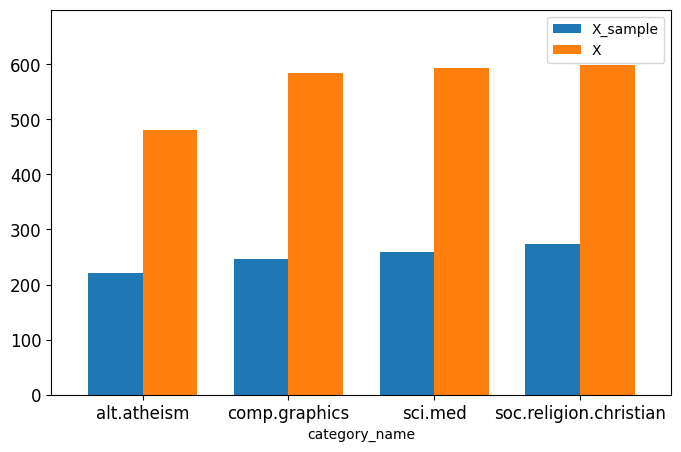

In [ ]:
counts_sample = X_sample['category_name'].value_counts().sort_index()
counts_full = X['category_name'].value_counts().sort_index()

# Combine into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'X_sample': counts_sample,
    'X': counts_full
}).fillna(0)

ax = comparison_df.plot(
    kind='bar',
    width=0.75,
    ylim = [0, X.category_name.value_counts().max()+100],
    rot = 0, fontsize = 12, figsize = (8, 5))


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www.\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['text'].apply(clean_text)

# 6. VISUALIZATIONS

The first graph is a histogram that shows the distribution of sentiments in the dataset. 

This graph is used to find out:
Which sentiment is most common on Reddit about stocks?
Are users generally positive or skeptical?


In [ ]:
# Employ plotly to make visualization
from matplotlib.pyplot import ylim
import plotly.express as px
import plotly.graph_objects as go

# Sentiment Distribution
fig1 = px.histogram(
    df, x='label', color='label',
    title="Sentiment Distribution (1=Positive, 0=Neutral, -1=Negative)",
    color_discrete_map={-1.0: "red", 0.0: "gray", 1.0: "green"}
)
fig1.update_layout(xaxis_title="Sentiment", yaxis_title="Count",)
fig1.show()

The second graph is a **box Plot** of **Text Length vs Sentiment**.
<br>
This graph is used to find out: **Do positive posts tend to be longer or shorter than negative ones? Is there much variation in text length across sentiments?**

In [ ]:
# Text Length Distribution by Sentiment
fig2 = px.box(
    df, x='label', y='text_length', color='label',
    title="Text Length vs Sentiment",
    color_discrete_map={-1.0: "red", 0.0: "gray", 1.0: "green"}
)
fig2.update_layout(xaxis_title="Sentiment", yaxis_title="Text Length (words)")
fig2.show()

The third graph is a **scatter plot** of **Polarity vs Subjectivity**.
<br>
This graph is used to find out: **Do more positive posts cluster around high polarity values? Are neutral posts near the middle of both axes?**

In [ ]:
# Polarity vs Subjectivity
fig3 = px.scatter(
    df, x='polarity', y='subjectivity', color='label',
    title="Polarity vs Subjectivity by Sentiment",
    color_discrete_map={-1.0: "red", 0.0: "gray", 1.0: "green"},
    hover_data=['subreddit', 'upvotes']
)
fig3.show()

The fourth graph is a **histogram** of **Posting Frequency by Hour and Sentiment**.
<br>
This graph is used to find out: **What hours have the most posts? Do certain times show more positive or negative sentiment?**

In [ ]:
# Posting Frequency by Hour
fig4 = px.histogram(
    df, x='hour', color='label', nbins=24, barmode='stack',
    title="Posting Frequency by Hour and Sentiment",
    color_discrete_map={-1.0: "red", 0.0: "gray", 1.0: "green"}
)
fig4.update_layout(xaxis_title="Hour of Day", yaxis_title="Post Count")
fig4.show()

The fifth graph is a **bar chart** about **Average Polarity by Subreddit**.
<br>
This graph is used to find out: **Which subreddit is most optimistic or pessimistic? Are there communities that consistently lean one way?**


In [ ]:
# Sentiment by Subreddit (mean polarity)
subreddit_summary = df.groupby('subreddit', as_index=False)['polarity'].mean()
fig5 = px.bar(
    subreddit_summary, x='subreddit', y='polarity',
    color='polarity', color_continuous_scale='PuRd',
    title="Average Polarity by Subreddit"
)
fig5.update_layout(xaxis_title="Subreddit", yaxis_title="Average Polarity")
fig5.show()

The sixth graph is a **heatmap** of key features which can examine how numerical features (such as subjectivity, polarity, upvotes) relate to each other.
<br>
This graph is used to find out: **Which features are strongly correlated with each other? Do certain features have a significant impact on others?**


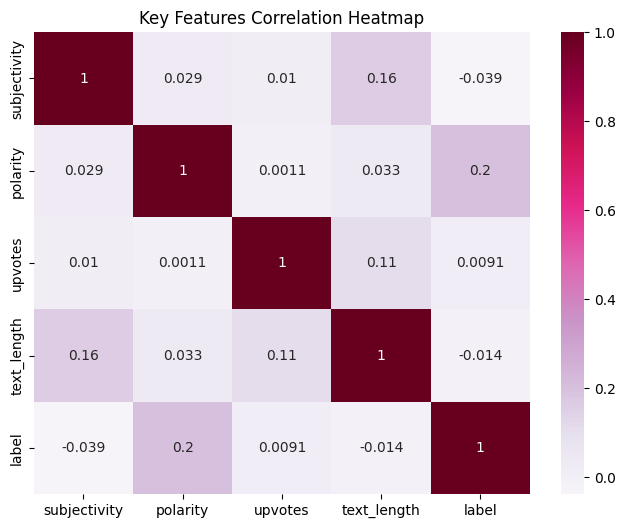

In [ ]:
plt.figure(figsize=(8,6))
corr = df[['subjectivity', 'polarity', 'upvotes', 'text_length', 'label']].corr()
sns.heatmap(corr, annot=True, cmap='PuRd')
plt.title("Key Features Correlation Heatmap")
plt.show()

---

# Phase 2

In [ ]:
### Begin Assignment Here